In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("D:\Py Django\DataScience\Classification\Random Forest\Classification\loan_800.csv")
df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,Female,Yes,Not Graduate,Yes,Semiurban,0
1,17725,2777,559,12,1,Male,No,Graduate,Yes,Urban,0
2,19730,12298,216,84,1,Male,Yes,Not Graduate,No,Semiurban,1
3,23602,3003,523,84,1,Male,Yes,Graduate,Yes,Urban,0
4,17377,3871,413,36,1,Female,Yes,Graduate,Yes,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,Male,Yes,Graduate,No,Urban,1
796,15120,230,426,240,1,Female,No,Not Graduate,Yes,Semiurban,0
797,3904,14384,552,12,1,Female,Yes,Graduate,Yes,Rural,0
798,16884,12622,428,180,0,Male,Yes,Not Graduate,Yes,Rural,0


In [3]:
Gender = LabelEncoder()
Married = LabelEncoder()
Education = LabelEncoder()
Self_Employed = LabelEncoder()
Property_Area = LabelEncoder()


df['Gender'] = Gender.fit_transform(df['Gender'])
df['Married'] = Married.fit_transform(df['Married'])
df['Education'] = Education.fit_transform(df['Education'])
df['Self_Employed'] = Self_Employed.fit_transform(df['Self_Employed'])
df['Property_Area'] = Property_Area.fit_transform(df['Property_Area'])
df

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,21966,14877,549,84,0,0,1,1,1,1,0
1,17725,2777,559,12,1,1,0,0,1,2,0
2,19730,12298,216,84,1,1,1,1,0,1,1
3,23602,3003,523,84,1,1,1,0,1,2,0
4,17377,3871,413,36,1,0,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
795,10974,12213,76,36,1,1,1,0,0,2,1
796,15120,230,426,240,1,0,0,1,1,1,0
797,3904,14384,552,12,1,0,1,0,1,0,0
798,16884,12622,428,180,0,1,1,1,1,0,0


In [4]:
x = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state=30)

In [6]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
x_pred = model.predict(x_test)
x_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0])

In [8]:
accuracy = accuracy_score(x_pred,y_test)
accuracy

1.0

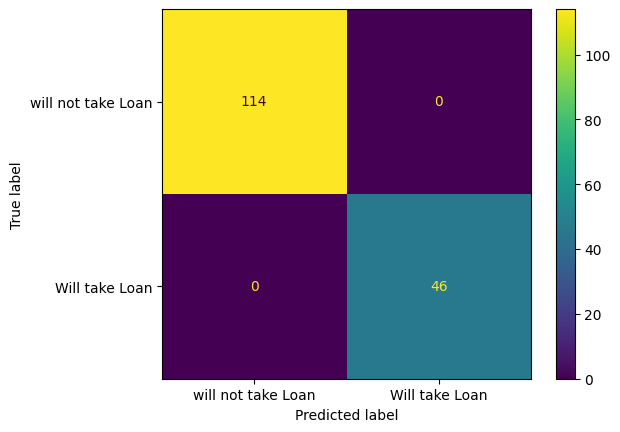

In [9]:
con_matrix = confusion_matrix(x_pred,y_test)
display = ConfusionMatrixDisplay(confusion_matrix= con_matrix  , display_labels = ["will not take Loan", "Will take Loan"])
display.plot()
plt.show()

In [10]:
new_Gender = Gender.transform(["Male"])[0]
new_Married = Married.transform(["No"])[0]
new_Education = Education.transform(["Graduate"])[0]
new_Self_Employed  = Self_Employed .transform(["Yes"])[0]
new_Property_Area = Property_Area.transform(["Urban"])[0]

new_data = np.array([[21966,14877,549,84,0,new_Gender,new_Married,new_Education,new_Self_Employed,new_Property_Area]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("will take Loan")
else:
    print("will not take Loan")

will not take Loan


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
